In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import flexpart_management.modules.flx_array as fa
import flexpart_management.modules.constants as cons

In [3]:
ds1 = xr.open_dataset('/tmp/dd4.nc')
ds2 = xr.open_dataset('/tmp/dd02.nc')

In [4]:
rel = slice(0,None)
tim = slice(0,None)
dic = {fa.RL:rel,fa.TIME:tim}
zc = 'ZMID*CONC'
dsn = ds2[[fa.CONC]][dic]
dsn[zc]=dsn[fa.CONC]*dsn[fa.ZM]

In [5]:
val=np.array([.09,np.pi/36])*2

In [7]:
dsn[zc]=dsn[zc].where(dsn[zc]>0)

In [8]:
dim2keep = [fa.TIME,fa.RL]

In [9]:
dsum = dsn.sum(dim=fa.ZM)
dsum = dsum.where(dsum[fa.CONC]>0)

In [10]:
_a1 = fa.data_array_to_logpolar(dsum[zc],*val,dim2keep=dim2keep)
_a2 = fa.data_array_to_logpolar(dsum[fa.CONC],*val,dim2keep=dim2keep)


In [14]:
z=(_a1/_a2)
zn='z'
z.name = zn

In [26]:
z99 = z.quantile(.99).values
c99 = _a2.quantile(.99).values

In [27]:
c99

array(4.2930069)

KeyboardInterrupt: 

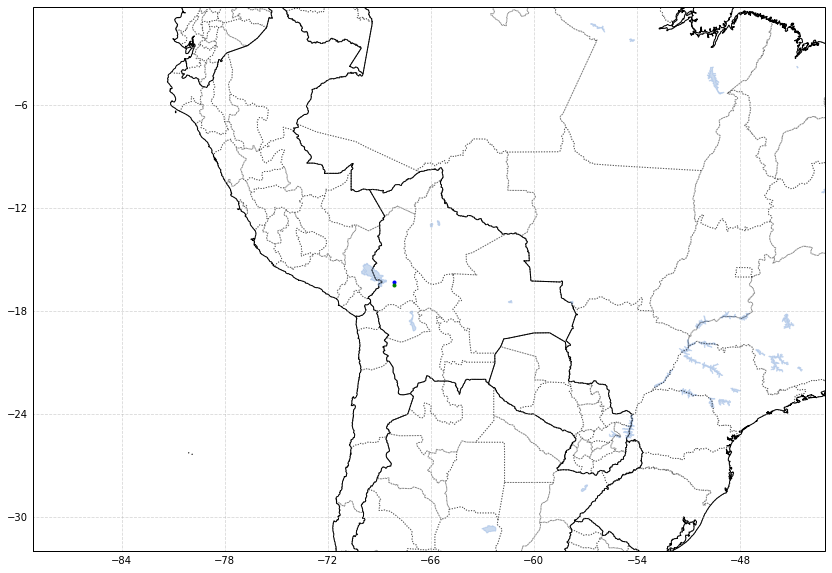

In [28]:

ax = fa.get_ax_bolivia()
fa.logpolar_plot(z,ax=ax,name=zn,patch_args={'cmap':'viridis'})
ax = fa.get_ax_bolivia()
fa.logpolar_plot(_a2,ax=ax,perM=.99)